<a href="https://colab.research.google.com/github/Deep-Dey1/FUN-PIANO/blob/main/deeplearning_lab6_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7979 - loss: 0.5974 - val_accuracy: 0.8409 - val_loss: 0.4576
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8943 - loss: 0.2977 - val_accuracy: 0.8961 - val_loss: 0.2788
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9125 - loss: 0.2451 - val_accuracy: 0.9057 - val_loss: 0.2499
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9229 - loss: 0.2162 - val_accuracy: 0.8951 - val_loss: 0.2928
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9326 - loss: 0.1893 - val_accuracy: 0.9118 - val_loss: 0.2563
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9353 - loss: 0.1771 - val_accuracy: 0.8797 - val_loss: 0.3790
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9435 - loss: 0.1586 - val_accuracy: 0.9197 - val_loss: 0.2268
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9488 - loss: 0.1398 - val_accuracy: 

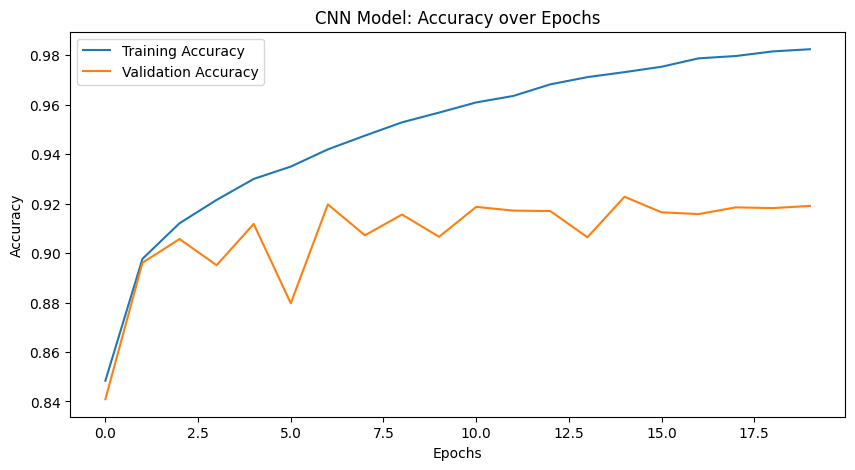

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist  # Use MNIST or CIFAR-10 as needed
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset (Use mnist/cifar10 as needed)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape dataset for CNN input (28x28 grayscale images with 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model with padding and batch normalization
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(10, activation='softmax')  # Output layer for 10 categories
    ])

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create CNN model
cnn_model = build_cnn_model()

# Train CNN model and record accuracy over epochs
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate model performance
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Accuracy vs. Epochs
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model: Accuracy over Epochs')
plt.legend()
plt.show()


Saving image.jpg to image.jpg


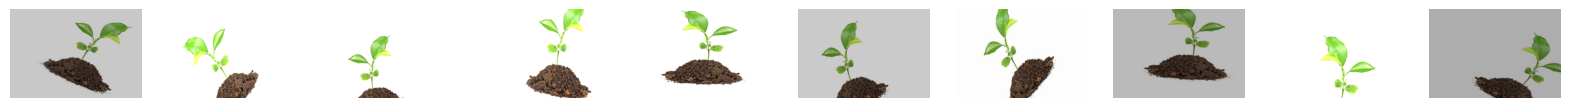

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Create a directory to save augmented images
os.makedirs("augmented_images", exist_ok=True)

# Upload an image manually in Google Colab
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load the uploaded image
image = load_img(image_path)  # Load image as PIL object
image_array = img_to_array(image)  # Convert to array
image_array = np.expand_dims(image_array, axis=0)  # Expand dimensions to match input format

# Define Data Augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

# Generate and visualize augmented images
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

# Generate images
i = 0
for batch in datagen.flow(image_array, batch_size=1, save_to_dir="augmented_images", save_prefix="aug", save_format="jpg"):
    ax = axes[i]
    ax.imshow(batch[0].astype('uint8'))
    ax.axis('off')
    i += 1
    if i == num_images:
        break  # Stop after generating required images

plt.show()
